# Final Year Project - Times of Malta Image Analysis Section

## Overview

In this section, the image information scraped from the Times of Malta website and saved into the csv files is analysed to better understand which sub-categories are mostly utilised with their parent category. For example, we would be able to conclude that the Sports category has many articles under the Football sub-category. 

Hence, we open the csv files related to the article information and check what sub-categories were used. Note that the article information was saved in csv files by the way it was scraped. Therefore, each section / main category's articles are analysed seperately.

## Installing / Importing Packages

The following packages are required for the notebook to work.

In [164]:
#Importing necessary packages
from matplotlib import pyplot as plt
from matplotlib import cm
from math import log10
import pandas as pd
import operator
import csv

## Setting List of Paths

Two lists are being created to store the paths to the article information csv file and image information csv file.

In [165]:
#Creating list of paths to article information and image information csv files
articlePaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Business\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_National\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Sport\\Article_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_World\\Article_Information.csv']
imagePaths = ['.\\TOM_Dataset\\TOM_Dataset_Inset\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Business\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_National\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Opinion\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_Sport\\Image_Information.csv', '.\\TOM_Dataset\\TOM_Dataset_World\\Image_Information.csv']

## Defining Function to Count Number of Inset Images

In this function, path to the image information csv file is passed. A counter is set to zero and the file is opened. If in the image row the "Inset" attribute is True, then the counter is incremented by one.

In [166]:
#Function to count number of inset and non-inset images
def countInsets(data):
    #Setting initial counters to zero
    insetCounter = 0
    notInsetCounter = 0
    #Opening the files
    with open(data, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        #For each row in the file
        for row in spamreader:
            #If the inset attribute is True, increment the insetCounter, otherwise increment the notInsetCounter
            if row[3] == "True":
                insetCounter += 1
            else:
                notInsetCounter += 1
    #Return the counters as a list
    return [insetCounter, notInsetCounter]

## Display number of Inset and Non-Inset Images per Section

For each path in the imagePaths list, the countInsets() function defined earlier is called and the number of Inset Images per section is calculated and displayed as a table.

In [167]:
#Creating Lists
information = []
columnNames = []
rowNames = ["Inset", "Not-Inset"]

#For each path
for path in imagePaths:
    #Call the countInsets() function and save the returned information
    returnedInformation = countInsets(path)
    #Append the column names and returned information to their respective lists
    columnNames.append(path.split("\\")[2].split("TOM_Dataset_")[1])
    information.append(returnedInformation)

#Transpose the dataframe and display it
df = pd.DataFrame(information, columnNames, rowNames).transpose()
df

,Inset,Business,National,Opinion,Sport,World
Inset,67,2,6,1,0,1
Not-Inset,201,245,277,253,189,204


## Defining Function to Count the Frequency of each Sub-Category

In this function, path to the article information csv file is passed. The file is opened and for each entry in the file, the "Categories" attribute is read and split into seperate substrings using the comma as a delimiter. Following this, the dictionary categoryCounts is altered by incrementing the value of the associated key, this being the category name, by one. Finally, the categories are then sorted by value in descending order.

In [168]:
#Defining a function to calculate the frequency of each sub-category
def categoriesDictionary(data):

    #Creating a dictionary called categoryCounts
    categoryCounts = {}

    #Opening csv file
    with open(data, newline='') as csvfile:
        spamreader = csv.reader(csvfile)

        #Ignoring the first row of attribute names
        next(spamreader)

        #For each row in the csv file
        for row in spamreader:
            #For each substring in the fifth column of the entry delimited by a comma
            for category in row[4].split(','):
                #Incrementing the categoryCounts value by one using the category as the key
                categoryCounts[category] = categoryCounts.get(category, 0) + 1
    
    #Sorting the categoryCounts keys in descending order of their respective values
    categoryCounts = sorted(categoryCounts.items(), key=operator.itemgetter(1), reverse=True)

    #Creating a list called updatedCategoryCounts
    updatedCategoryCounts = []

    #For each tuple in categoryCounts
    for category in categoryCounts:

        #If the category name in the tuple does not match with the section type in the parameter passed
        if category[0] != data.split("\\")[2].split("TOM_Dataset_")[1]:

            #Appending the tuple to the updatedCategoryCountsList
            updatedCategoryCounts.append(category)

    #Returning the updatedCategoryCounts list
    return updatedCategoryCounts

## Display Sub-Category Frequencies by Section

For each path, the categoriesDictionary() function is called on it and the returned information is appended to the dictionary articleInformation using the section name as the key.

In [169]:
#Creating a dictionary called articleInformation
articleInformation = {}

#For each path
for path in articlePaths:
    #Calling the categoriesDictionary() function, passing the path as a parameter and storing  
    #the returned list in the articleInformation dictionary using the section name as a key
    articleInformation[path.split("\\")[2].split("TOM_Dataset_")[1]] = categoriesDictionary(path)

    #Displaying the results
    print(path.split("\\")[2].split("TOM_Dataset_")[1] + ": ")
    print(articleInformation[path.split("\\")[2].split("TOM_Dataset_")[1]])
    print()

Inset: 
[('National', 64), ('Community', 12), ('Entertainment', 9), ('History', 8), ('Murder', 7), ('Court', 7), ('Crime', 6), ('Construction', 6), ('World', 6), ('Police', 5), ('Gozo', 5), ('Business', 4), ('Society', 4), ('FIAU', 4), ('Economy', 4), ('Gaming', 4), ('Yorgen Fenech', 3), ('Planning Authority', 3), ('Accident', 3), ('Exhibition', 3), ('Maritime', 2), ('Environment', 2), ('Opinion', 2), ('Letters', 2), ('Government', 2), ('Greece', 2), ('Tourism', 2), ('Charity', 2), ('Children', 2), ('Disability', 2), ('Buġibba', 2), ('Tech', 2), ('Architecture', 2), ('COVID-19', 2), ('Books', 2), ('Russia', 2), ('Art', 2), ('Mqabba', 2), ('Adrian Delia', 2), ('PN', 2), ('President of Malta', 2), ('Mosta', 1), ('War', 1), ('Features', 1), ('Media', 1), ('Politics', 1), ('Analysis', 1), ('St Paul’s Bay', 1), ('Justice', 1), ('Royal Family', 1), ('Hospitals deal', 1), ('Diplomacy', 1), ('Electrogas', 1), ('Daphne Caruana Galizia', 1), ('Libya', 1), ('Ħamrun', 1), ('Valletta', 1), ('Religi

In [170]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data: categories and their frequencies
# categories = ['Politics', 'Sports', 'Technology', 'Entertainment', 'Science']
# frequencies = [25, 40, 20, 30, 15]

# # Calculate the angles for each category
# angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# # Make the plot
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, polar=True)

# # Plot the bars
# bars = ax.bar(angles, frequencies, width=0.4, align='edge')

# # Set the labels for each category
# ax.set_xticks(angles)
# ax.set_xticklabels(categories)

# # Add grid lines
# ax.grid(True)

# plt.title('Radial Chart of Category Frequencies')
# plt.show()

## Defining Function to Display a Radial Bar Chart

This function takes the sub-category frequencies which were calculated earlier and displays them as a radial bar chart. 

In [171]:
#Defining a function to display a radial bar chart
def displayRadialChart(categoryFrequency, name):
    #Retrieving the labels and frequencies of the categories
    labels = []
    frequencies = []
    for tuple in categoryFrequency:
        labels.append(tuple[0])
        frequencies.append(tuple[1])

    #Calculating the number of bars to be used
    num = len(frequencies)

    #Finding the maximum value for the full ring
    k = 10 ** int(log10(max(frequencies)))
    maximum = k * (1 + max(frequencies) // k)

    #Setting the radius of the chart
    radius = 1.25
    #Calculating the width of each ring
    width = radius / num

    #Setting the colours
    colors = [cm.terrain(i / num) for i in range(num)]

    #Create the figures and axis
    _, ax = plt.subplots()
    ax.axis("equal")

    #Creating the rings of the chart
    for i in range(num):
        #Adding rings to the chart, with the appropriate parameters
        innerring, _ = ax.pie([maximum - frequencies[i], frequencies[i]], radius = radius - i * width, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (num - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
        plt.setp(innerring, width = width, edgecolor = "white")

    #Setting the title
    plt.title(name)

    #Adding the legend
    plt.legend(loc="upper left", fontsize="8")

    #Displaying radial bar chart
    plt.show()

## Display Radial Bar Chart of each Section

The displayRadialChart() function defined earlier is now called for each section's categories, also the first fifteen categories are passed. This was done to limit the size of the radial bar chart to preserve its readibility.

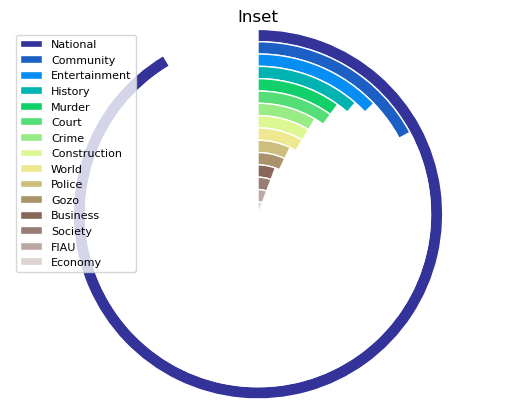

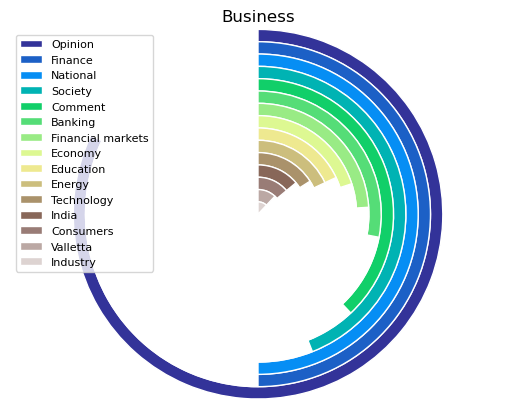

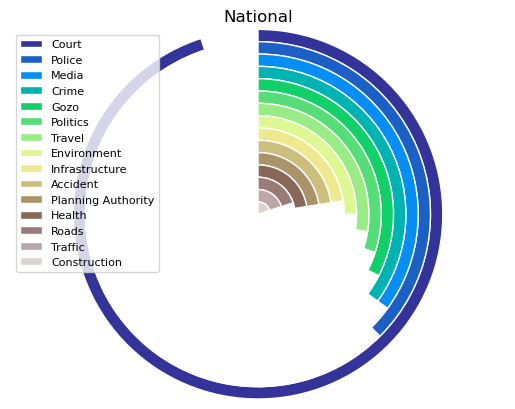

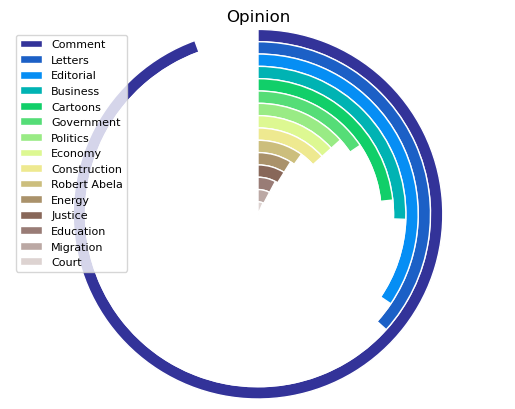

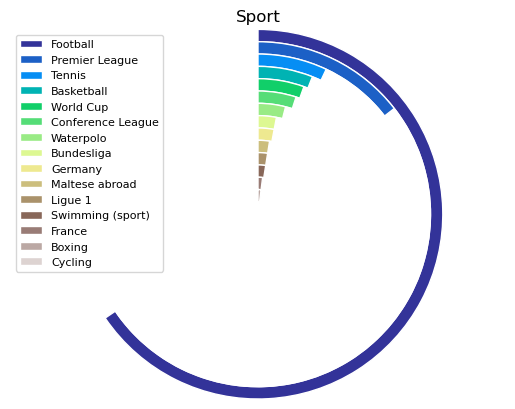

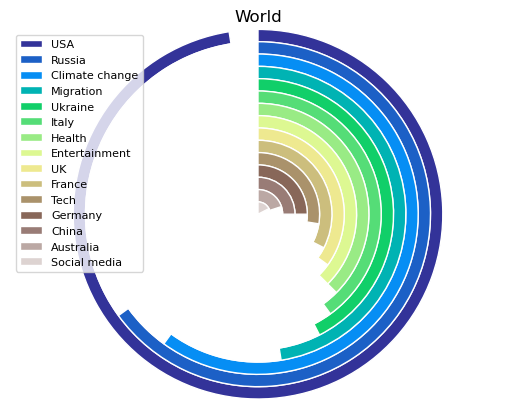

In [172]:
#For each article section
for key in articleInformation.keys():
    #Call the displayRadialChart() function, passing the first fifteen entries and the section name
    displayRadialChart(articleInformation[key][0:15], key)